- bilibili：https://www.bilibili.com/video/BV1RKkbYSEoS?spm_id_from=333.788.player.switch&vd_source=1b6c2fd68d9aac5e58af1bfba4b04328
- 博客园：https://www.cnblogs.com/pinard/p/6638955.html

$$
\begin{align}
f(s)=exp(\frac{-s^4}4+\frac{s^2}2)
\end{align}
$$
$$
\begin{align}
g(s)=\frac{1}{\sqrt{2\pi}}exp(-\frac{s^2}2)
\end{align}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 设定随机种子以保证结果可重复
np.random.seed(42)

# 定义目标函数 f(s)
def f(s):
    return np.exp(-s**4/4 + s**2/2)

# 定义提议分布g(s)和其概率密度函数分布
def g(s):
    return norm.pdf(s,loc=0,scale=1)

In [2]:
%%time
# 确定常数c
# 我们通过提取 f(s)/g(s) 的最大值来估计 c
s_vals = np.linspace(-3,3,1000)
ratio = f(s_vals) / g(s_vals)
c=np.max(ratio) * 1.1  #添加10%的安全边际
print(f"估计常数 c:{c:.4f}")

估计常数 c:7.4951
Wall time: 3 ms


In [14]:
# 接受-拒绝采样函数
def acceptance_rejection_sampling(f,g,c,size=10000):
    samples = []
    num_attempts = 0
    while len(samples) < size:
        s = np.random.normal(0,1)   #从g(s)中采样
        
        # 方式1
        u = np.random.uniform(0,c*g(s))
        if u < f(s):
            samples.append(s)
        
#         # 方式2
#         r = np.random.random()
#         if r < f(s) /(c*g(s)):
#             samples.append(s)
        
        num_attempts += 1
        
    acceptance_rate = size/num_attempts   #接受率
    return np.array(samples),acceptance_rate
        

In [15]:
%%time
# 进行采样
sample_size = 10000
samples,acc_rate = acceptance_rejection_sampling(f,g,c,size=sample_size)
print(f"接受率：{acc_rate*100:.2f}%")

接受率：52.18%
Wall time: 1.6 s


In [12]:
%%time
from scipy.integrate import quad
quad(f,-np.inf,np.inf)[0]/c

Wall time: 2.01 ms


0.5210257975961601

In [18]:
%%time
# 归一化 f(s) 以便比较（仅可以用作可视化）
def f_normalized(s):
    # 数值积分 f(s) 以获得归一化常数
    integral = quad(f,-np.inf,np.inf)[0]
    return f(s)/integral

Wall time: 0 ns


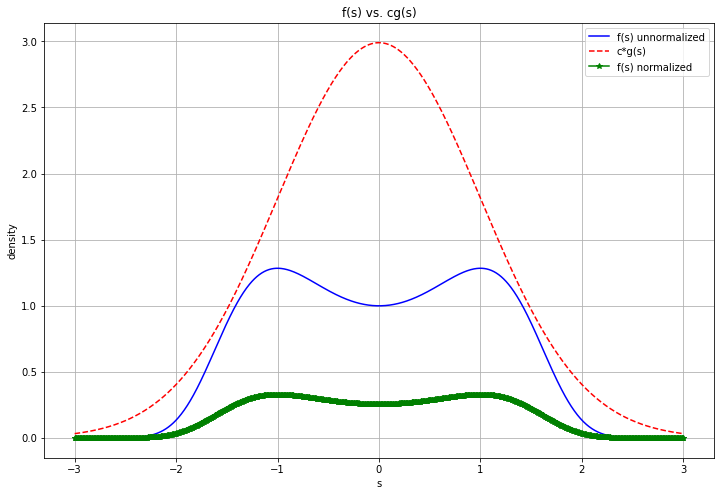

Wall time: 168 ms


In [36]:
%%time
# 创建绘图
s_plot = np.linspace(-3,3,1000)
f_plot = f(s_plot)
g_plot = g(s_plot)
cg_plot = c * g_plot

# 计算归一化的 f(s) 供比较
f_norm_plot = f_normalized(s_plot)

plt.figure(figsize=(12,8))

# 绘制目标函数 f(s)
plt.plot(s_plot,f_plot,label = 'f(s) unnormalized',color = 'blue')

# 绘制提议分布 cg(s)
plt.plot(s_plot,cg_plot,label = 'c*g(s)',color = 'red',linestyle = '--')

# 绘制归一化的 f(s)
plt.plot(s_plot,f_norm_plot,label = 'f(s) normalized',color = 'green',marker = '*')

# # 绘制提议分布 g(s)
# plt.plot(s_plot,g_plot,label = 'g(s) normalized',color = 'red',linestyle = '--')

plt.title('f(s) vs. cg(s)')
plt.xlabel('s')
plt.ylabel('density')
plt.legend()
plt.grid(True)
plt.show()

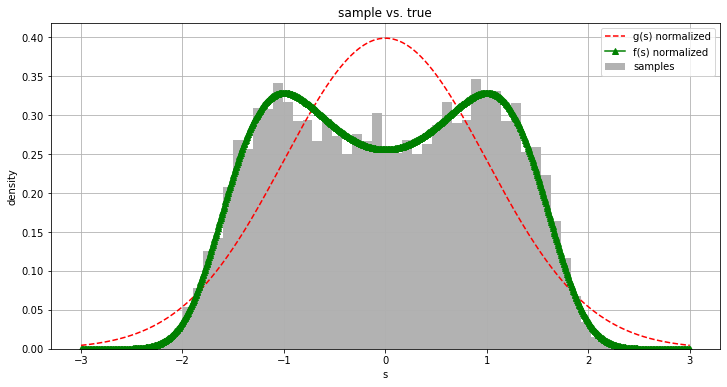

In [39]:
# 绘制采样结果的直方图与真实分布对比
plt.figure(figsize = (12,6))
plt.hist(samples,bins=50,density=True,alpha=0.6,color='gray',label='samples')

# 绘制提议分布 g(s)
plt.plot(s_plot,g_plot,label = 'g(s) normalized',color = 'red',linestyle = '--')

# 绘制归一化的 f(s)
plt.plot(s_plot,f_norm_plot,label = 'f(s) normalized',color = 'green',marker = '^')

plt.title('sample vs. true')
plt.xlabel('s')
plt.ylabel('density')
plt.legend()
plt.grid(True)
plt.show()